In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath

if Path('../data').exists():
    data_directory = PurePath("../data")
    print(data_directory)
    
if Path('../visuals').exists():
    viz_directory = PurePath("../visuals")
    print(viz_directory)
    
if Path('../src').exists():
    src_directory = PurePath("../src")
    print(src_directory)


..\data
..\visuals
..\src


### Unfortunatly we cannot run merge script effortlessly from ipython
This is mostly because we have a prompt, instead do the following:
From the root of the directory or inside src:

`python merge_csv.py` or `python src/merge_csv.py`

This will create a merged result of different runs you have accumulated.


In [2]:
# %run -n  "../src/merge_csv.py"

In [3]:
checkout = pd.read_csv(f"{data_directory}/merged_results.csv")
checkout["NumberOfElements"] = 2**checkout["2^N"]

In [4]:
checkout["Time/N (us)"] = ((checkout['Time']/checkout['NumberOfElements'])*1e6).to_numpy(dtype='float32')
sorting_algos = checkout.Algorithm.unique()

In [5]:
sorting_algos

array(['bubble_sort', 'insertion_sort', 'python_sort', 'numpy_sort',
       'iterative_quicksort_shufffle', 'mergesort', 'mergesort_combined',
       'iterative_quicksort'], dtype=object)

In [24]:
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 6

In [25]:
height=100
width=120
IMAGE_SIZE = (width/25.4, height/25.4)

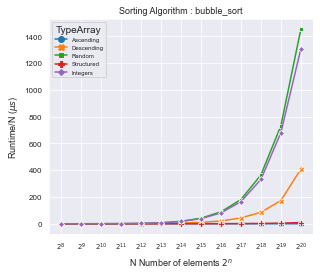

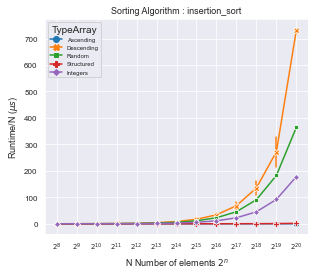

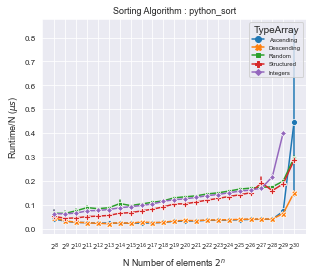

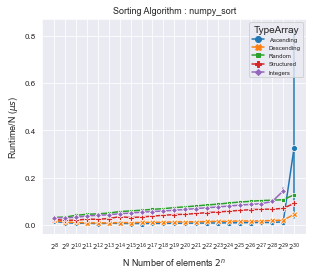

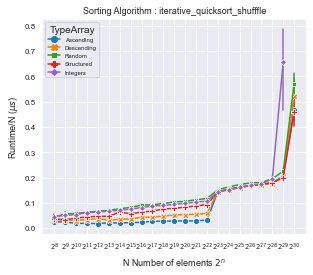

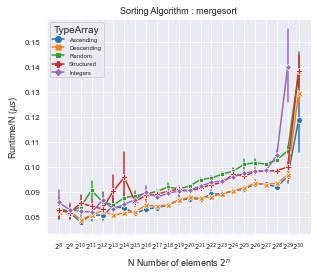

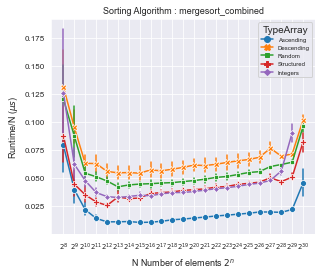

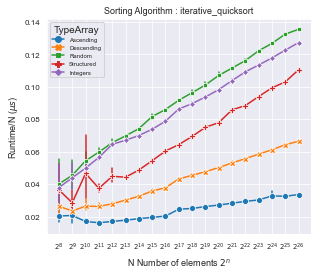

In [26]:
def plot_runtime_per_n(df, algo, start=7, lowerbound=None, upperbound=None, image_size=(10,10)):
    sns.set_style("darkgrid")
    plt.figure(figsize=image_size)
    time_per_n = sns.lineplot(
        data=checkout[(checkout.Algorithm == algo) & (checkout["2^N"] > 7)], 
        x="2^N", y="Time/N (us)", hue="TypeArray", style="TypeArray", markers=True, dashes=False, err_style="bars",
    )
    
    time_per_n.set(yscale="linear", xscale="linear")
    time_per_n.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
    time_per_n.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1))])
    time_per_n.set(xticklabels=[r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1))])
    time_per_n.set(title=f"Sorting Algorithm : {algo}")
    
    plt.savefig(f"{viz_directory}/time_per_n{algo}.pdf", bbox_inches='tight', transparent=True)
    plt.show()

for algo in sorting_algos:
    plot_runtime_per_n(df=checkout, algo=algo, start=7, image_size=IMAGE_SIZE)
    



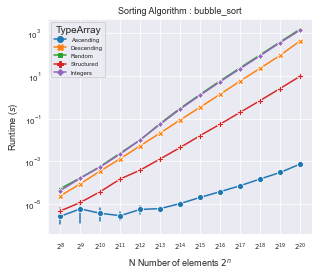

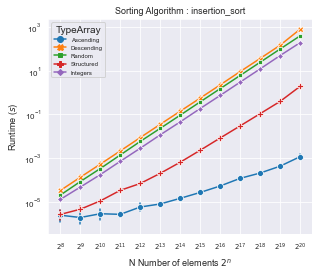

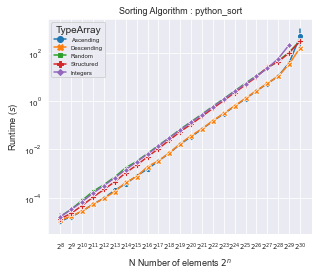

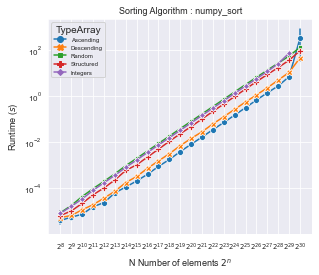

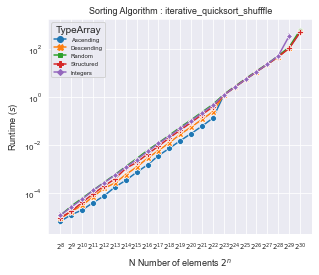

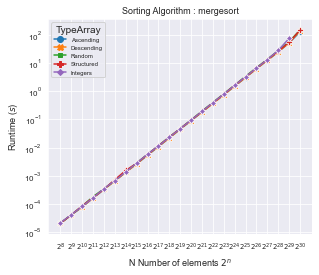

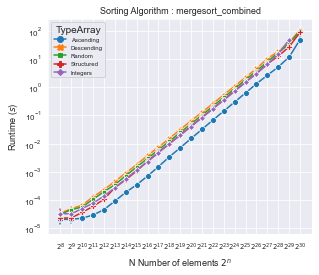

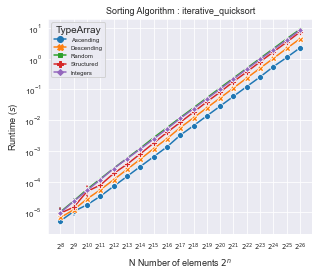

In [27]:
def plot_runtime(df, algo, start=7, lowerbound=None, upperbound=None, image_size=(10,10)):
    sns.set_style("darkgrid")
    plt.figure(figsize=image_size)
    runtime = sns.lineplot(
        data=checkout[(checkout.Algorithm == algo) & (checkout["2^N"] > start)], 
        x="2^N", y="Time", hue="TypeArray", style="TypeArray", markers=True, dashes=False, err_style="bars",
    )
    
    runtime.set(yscale="log")
    runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime ($s$)")
    runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1))])
    runtime.set(xticklabels=[r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1))])
    runtime.set(title=f"Sorting Algorithm : {algo}")
    
    plt.savefig(f"{viz_directory}/runtime{algo}.pdf", bbox_inches='tight', transparent=True)
    plt.show()
    
for algo in sorting_algos:
    plot_runtime(df=checkout, algo=algo, start=7, image_size=IMAGE_SIZE)






In [28]:
checkout.sample(5)

,Unnamed: 0,Unnamed: 0.1,Algorithm,2^N,TypeArray,Time,NumberOfElements,Time/N (us)
5151,5151,3201,python_sort,26,Structured,11.844182,67108864,0.176492
5060,5060,3110,iterative_quicksort_shufffle,25,Integers,5.463827,33554432,0.162835
5068,5068,3118,mergesort,25,Integers,3.305694,33554432,0.098517
10285,10285,1185,iterative_quicksort_shufffle,10,Random,0.000084,1024,0.081641
12308,12308,3208,numpy_sort,26,Structured,4.663907,67108864,0.069498


# Comparisons
#### bubble_sort and insertion_sort

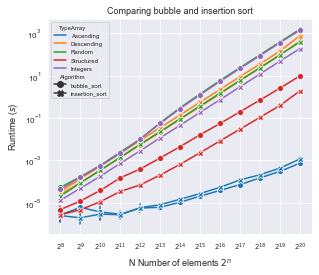

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "bubble_sort") | (checkout.Algorithm == "insertion_sort")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="log")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime ($s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "bubble_sort"]['2^N'] + 1))])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "bubble_sort"]['2^N'] + 1))
])
runtime.set(title=f"Comparing bubble and insertion sort")

plt.savefig(f"{viz_directory}/runtimebubble&insertion.pdf", bbox_inches='tight', transparent=True)
plt.show()

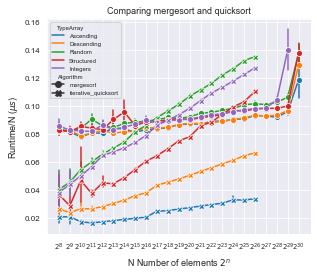

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort") | (checkout.Algorithm == "iterative_quicksort")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="linear")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1))])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1))
])
runtime.set(title=f"Comparing mergesort and quicksort")

plt.savefig(f"{viz_directory}/runtime_per_n_merge&quick.pdf", bbox_inches='tight', transparent=True)
plt.show()

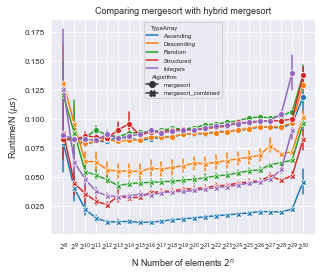

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort") | (checkout.Algorithm == "mergesort_combined")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="linear")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1))])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1))
])
runtime.set(title=f"Comparing mergesort with hybrid mergesort")

plt.savefig(f"{viz_directory}/runtime_per_n_merge&combined.pdf", bbox_inches='tight', transparent=True)
plt.show()

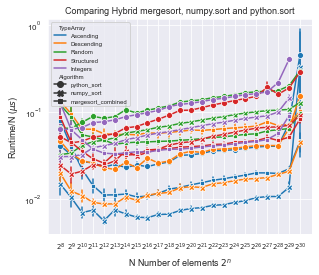

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort_combined") 
                   | (checkout.Algorithm == "numpy_sort")
                   | (checkout.Algorithm == "python_sort")) 
                  & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="log")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort_combined"]['2^N'] + 1))])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1))
])
runtime.set(title=f"Comparing Hybrid mergesort, numpy.sort and python.sort")

plt.savefig(f"{viz_directory}/runtime_per_n_combined&np&py.pdf", bbox_inches='tight', transparent=True)
plt.show()